# RESUME SCREENING!

In [ ]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
resume_set = pd.read_csv('UpdatedResumeDataSet.csv')
resume_set.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [ ]:
resume_set.isnull().count()

Category    962
Resume      962
dtype: int64

In [ ]:
print("Totally we are having "+str(len(resume_set['Category'].unique()))+" distinct categories of resumes.")
print ("Here we can see the distinct categories of resume and number of resumes as per catogery.\n")
print (resume_set['Category'].value_counts())

Totally we are having 25 distinct categories of resumes.
Here we can see the distinct categories of resume and number of resumes as per catogery.

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
Sales                        40
ETL Developer                40
Mechanical Engineer          40
Operations Manager           40
Data Science                 40
Arts                         36
Database                     33
PMO                          30
Electrical Engineering       30
Health and fitness           30
DotNet Developer             28
Business Analyst             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64


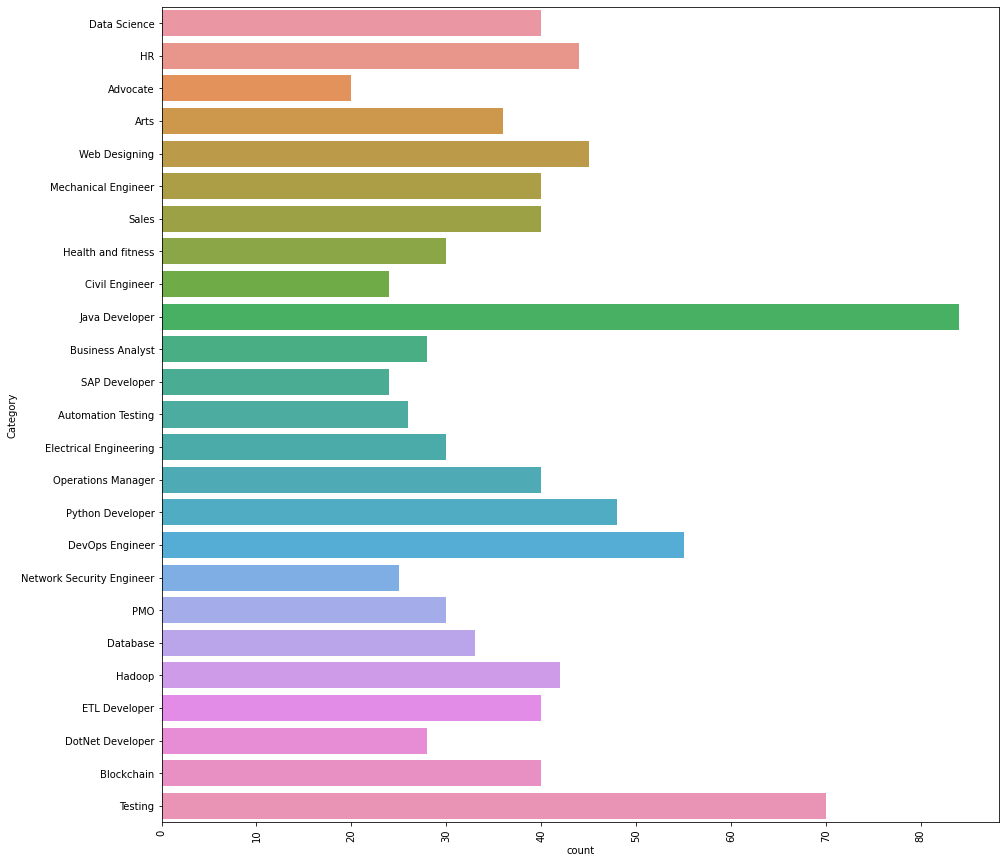

In [ ]:
plt.figure(figsize=(15,15))
plt.xticks(rotation=90)
sns.countplot(y="Category", data=resume_set)

# Now I will create a helper function by using library called "re" to remove the URLs, hashtags, mentions, special letters, and punctuations:



In [ ]:
def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  #  to remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # to remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # to remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # to remove mentions
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) 
    resumeText = re.sub('\s+', ' ', resumeText)  # to remove extra whitespace
    return resumeText
    
resume_set['cleaned_resume'] = resume_set.Resume.apply(lambda x: cleanResume(x))

So now we have removed the URL's,hahtags,extra spaces,punctuations abd mentions.

# Training Machine Learning Model for Resume Screening

# We have already cleaned the data and now we have to train our model by splitting the data.

In [ ]:
requiredText = resume_set['cleaned_resume'].values ## we can simply assume this values as "X".
requiredTarget = resume_set['Category'].values  ## same as above assume this values as "Y".

We have to remember a point that can't be act as features so our "X" what we have assuming as "requiredText" must be converted to features of words so that we can train out model

In [ ]:
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english',
    max_features=1500)
word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)

# so we have converted the text which has been extracted from the data set into features so that we can train our model. 

# From here our "X" is WordFeatures and "Y" is requiredTarget....

# To trian our model we must splite our model..

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(WordFeatures,requiredTarget,random_state=0, test_size=0.2)
print(X_train.shape)
print(X_test.shape)

(769, 1500)
(193, 1500)


# So we have given 80% of our data from dataset to train our model

# Now actual process to train our model will be created and trained..

Why we are taking KNN classifier for text classification?

Ans:       We’ll define K Nearest Neighbor algorithm for text classification with Python. KNN algorithm is used to classify by finding the K nearest matches in training data and then using the label of closest matches to predict. Traditionally, distance such as euclidean is used to find the closest match.
           For Text Classification, we’ll use nltk library to generate synonyms and use similarity scores among texts. We’ll identify the K nearest neighbors which has the highest similarity score among the training corpus.

In [ ]:
# we have created a model
clf = KNeighborsClassifier()
# Now have to fit our model by training datatset which we have separated from actual dataset.
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

# Finally we have created our model and trained our model using data

# Now have to predict our results through our trained model on testing data.

In [ ]:
prediction = clf.predict(X_test)

# Let's measure our model accuracy..

In [ ]:
from sklearn.metrics import accuracy_score
our_model_accuracy=accuracy_score(y_test,prediction)
print(our_model_accuracy)

0.9896373056994818


In [ ]:
 Kamal@7989
 